In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [42]:
df = pd.read_csv('/content/employee_salary_dataset.csv')
df.head(10)      # see top 10 of our data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [43]:
df = pd.read_csv('/content/employee_salary_dataset.csv')
df.tail(10)      # see last 10 of our data

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [44]:
df.describe()     # get more information

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


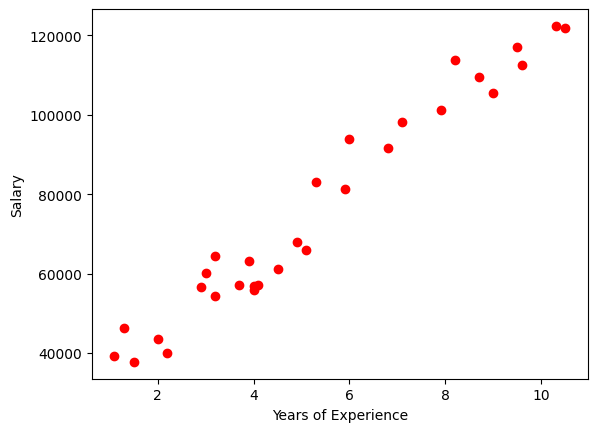

In [45]:
plt.scatter(df.YearsExperience	, df.Salary,  color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()           # show plot of our data(years of experience & salary)

In [46]:
msk = np.random.rand(len(df)) < 0.8            # Dividing our data into train(80%) and test(20%)
train = df[msk]
test = df[~msk]

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
# converting these data to array
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])

print(train_x[:3])
poly = PolynomialFeatures(degree=2)         # 1.1 p0 = 0  ,  1.1 p1 = 1.1  ,  1.1 p2 = 1.21
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[1.1]
 [1.5]
 [2. ]]


array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [48]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)        # The coefficients
print ('Intercept: ',clf.intercept_)       # The Intercept

# y = 26620 + 8676 x + 65 x*x

Coefficients:  [[    0.         10567.61052935  -108.97353794]]
Intercept:  [23881.41705215]


Text(0, 0.5, 'Salary')

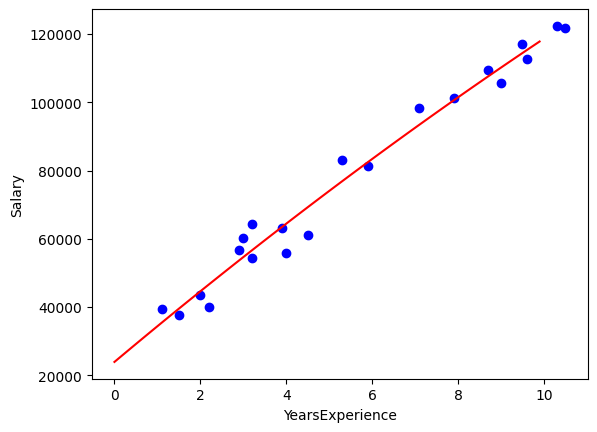

In [49]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [50]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 7228.22
Residual sum of squares (MSE): 61182245.69
R2-score: 0.86


In [51]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

while True:
    try:
        desired_experience = float(input('Enter your years of experience: '))
        if desired_experience < 0:
            print('You cannot enter a negative number!!')
            continue
        break
    except ValueError:
        print('You have to just enter a number!!')

# Transform input to match the number of features expected by the model
desired_experience_arr = np.array([[desired_experience]])
desired_experience_poly = poly.fit_transform(desired_experience_arr)

predicted_salary = clf.predict(desired_experience_poly)           # Predict the salary
predicted_salary_value = predicted_salary[0]           # Extract the predicted salary from the array

print(f"Predicted salary for {desired_experience} years of experience is equal to: {float(predicted_salary_value):.3f} $")

Enter your years of experience: 5.5
Predicted salary for 5.5 years of experience is equal to: 78706.825 $
